In [1]:
#Imports
from pathlib import Path
from datatree import DataTree
import dask
import xarray as xr
import pandas as pd
import valenspy as vp
import numpy as nps

## Load in the CORDEX.be I data: hallo


In [10]:
files= list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(files, chunks="auto")
alaro_ds

<xarray.Dataset> Size: 2TB
Dimensions:            (x: 485, y: 485, time: 543504, bnds: 2)
Coordinates:
  * x                  (x) float64 4kB 0.0 12.5 25.0 ... 6.038e+03 6.05e+03
  * y                  (y) float64 4kB 0.0 12.5 25.0 ... 6.038e+03 6.05e+03
  * time               (time) datetime64[ns] 4MB 1980-01-01 ... 2010-12-31T23...
    lon                (y, x) float64 2MB dask.array<chunksize=(485, 485), meta=np.ndarray>
    lat                (y, x) float64 2MB dask.array<chunksize=(485, 485), meta=np.ndarray>
    height             float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    huss               (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
    Lambert_Conformal  (time) object 4MB b'' b'' b'' b'' b'' ... b'' b'' b'' b''
    pr                 (time, y, x) float32 511GB dask.array<chunksize=(285, 485, 485), meta=np.ndarray>
    time_bnds          (time, bnds) datetime64[ns] 9MB dask.array<chunksize=(17569, 2), meta=np.ndarray>
    ps                 (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
    tas                (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
Attributes: (12/24)
    institute_id:                   RMIB-UGent
    model_id:                       RMIB-UGent-ALARO-0
    experiment_id:                  evaluation
    product:                        output
    Conventions:                    CF-1.6
    driving_model_id:               ECMWF-ERAINT
    ...                             ...
    endtime:                        347151600.0
    frequency:                      1hr
    creation_date:                  2019-01-30T21:07:50Z
    tracking_id:                    fce1ee51-5cab-4ff6-8bc5-ffca160ea1c3
    driving_experiment:             ECMWF-ERAINT, evaluation, r1i1p1
    history:                        Created by CordextractR v1.9-84-g0054a8f

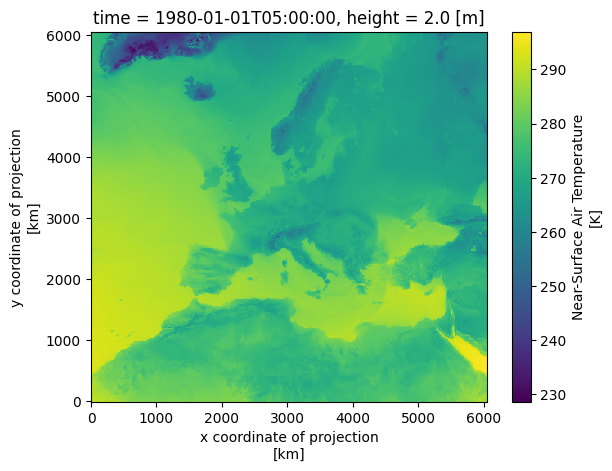

In [14]:
alaro_ds.tas.isel(time=10).plot()

# Load in the Observational data

In [2]:
ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")
ds

<xarray.Dataset> Size: 4GB
Dimensions:          (time: 24837, lat: 64, lon: 73)
Coordinates:
  * lon              (lon) float64 584B 2.45 2.508 2.565 ... 6.485 6.542 6.6
  * lat              (lat) float64 512B 49.35 49.39 49.42 ... 51.58 51.61 51.65
  * time             (time) datetime64[ns] 199kB 1954-01-01 ... 2021-12-31
Data variables:
    PRECIP_QUANTITY  (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_AVG         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_MAX         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_MIN         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
Attributes:
    Creators:                     Ghilain N., Van Schaeybroeck B., Marchi S.
    Version:                      1.1
    Affiliation:                  Royal Meteorological Institute of Belgium
    Url:                          https://opendata.meteo.be/geonetwork/srv/en...
    Coordinate reference system:  EPSG:4258
    Identifier:                   RMI_DATASET_GRIDDEDOBS

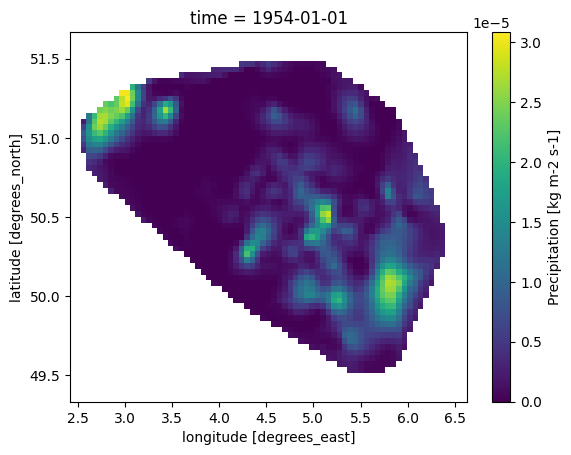

In [3]:
#plot the first time step for Precipitation
ds.PRECIP_QUANTITY.isel(time=0).plot()